In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
treino = pd.read_csv("../input/titanic/train.csv")
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
teste = treino.drop(['Name','Ticket','Cabin','PassengerId'],axis =1)
teste = teste.fillna('median')
y = teste.pop('Survived')
teste = teste.loc[:,['Sex','SibSp','Parch','Embarked','Pclass','Age','Fare']]
#discretefeatures = ['Sex','SibSp','Parch','Embarked','Pclass']
#discrete_features = teste.dtypes == int
features = ['Age','Fare']
for colname in teste.select_dtypes("object"):
    teste[colname], _ = teste[colname].factorize()

discrete_features = teste.dtypes == int    
       
def miplot(dataframe,target,discfeat):
    mi_scores = mutual_info_classif(dataframe, target, discrete_features=discfeat)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=dataframe.columns) #gera uma série com os scores
    mi_scores = mi_scores.sort_values(ascending=False)
    
    scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores) #plota um gráfico com os scores das features
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    return mi_scores
    

In [3]:
treino['Age'].fillna(treino['Age'].median(), inplace = True)

Sex         0.150870
Fare        0.113350
Age         0.074959
Pclass      0.058107
SibSp       0.023197
Embarked    0.016668
Parch       0.016366
Name: MI Scores, dtype: float64

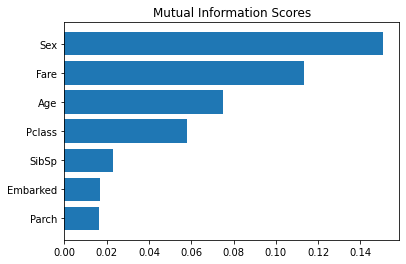

In [4]:
miplot(teste,y,discrete_features)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

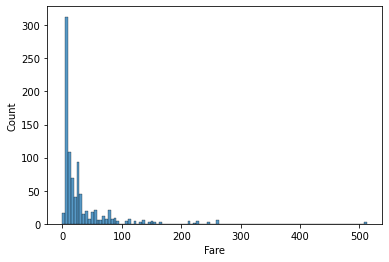

In [5]:
sns.histplot(teste['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

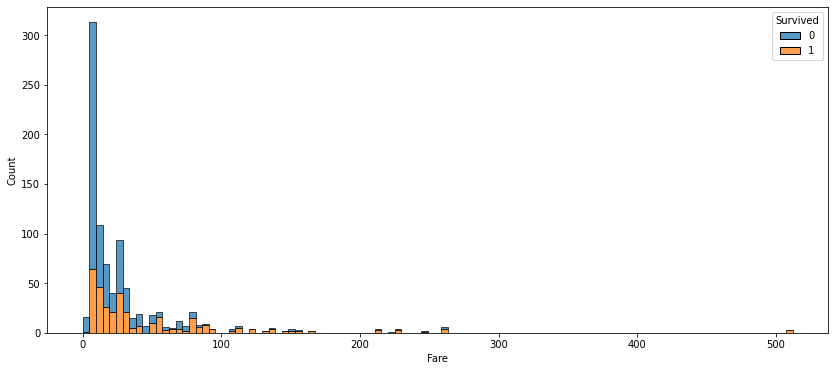

In [6]:
plt.figure(figsize=(14,6))
sns.histplot(data = treino,x='Fare',hue = 'Survived',multiple="stack")

<AxesSubplot:xlabel='Sex', ylabel='Count'>

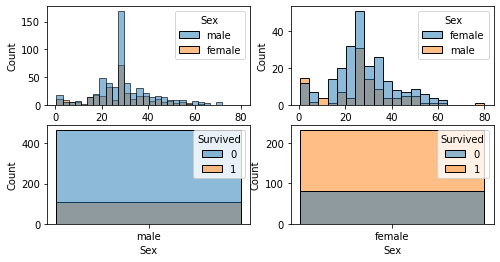

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(8, 4))
survivedage = treino['Survived'] == 1
agem = (treino['Sex'] == 'male')
agef = (treino['Sex'] == 'female')
sns.histplot(data = treino,x='Age',hue = 'Sex',multiple="layer",ax = axs[0,0])
sns.histplot(data=treino[survivedage], x='Age',hue = 'Sex',ax = axs[0,1])
sns.histplot(data = treino[agem],x='Sex',hue = 'Survived',ax = axs[1,0])
sns.histplot(data = treino[agef],x='Sex',hue='Survived',ax=axs[1,1])

Proporcionalmente, mais mulheres sobreviveram do que homens

In [8]:
# 9.2.1
treino[['Name','Title']] = treino['Name'].str.split(",",n=1,expand = True)
treino[['Title','delete']] = treino['Title'].str.split(".",n=1,expand = True)
treino = treino.drop(['Name','delete'],axis = 1)
display(treino)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


In [9]:
# 9.2.2
treino['FamilySize'] = treino['SibSp'] + treino['Parch']
display(treino)
treino['IsAlone'] = treino['FamilySize'] == 0
display(treino)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev,0
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,0
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,3
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr,0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev,0,True
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,0,True
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,3,False
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr,0,True


<AxesSubplot:xlabel='Age', ylabel='Fare'>

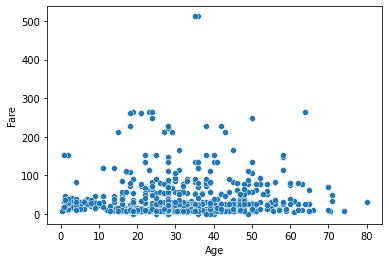

In [10]:
# 9.3.1
sns.scatterplot(data = treino, x ='Age',y='Fare')


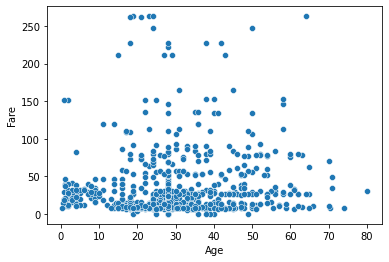

In [11]:
# 9.3.1 utilizando a função loc pra remover os outliers
cols = ['Age','Fare']
outrm = treino.copy()
outrm = outrm.loc[outrm['Fare'] < 500, ['Fare','Age']]
sns.scatterplot(data = outrm[cols], x ='Age',y='Fare')

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
outrm["Cluster"] = kmeans.fit_predict(outrm)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

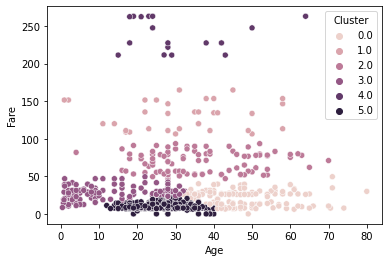

In [12]:
# 9.3.1 c)
treino = treino.join(outrm['Cluster'])
# scatter plot
sns.scatterplot(data = treino, x ='Age',y='Fare',hue = 'Cluster')

<AxesSubplot:xlabel='Cluster', ylabel='Survived'>

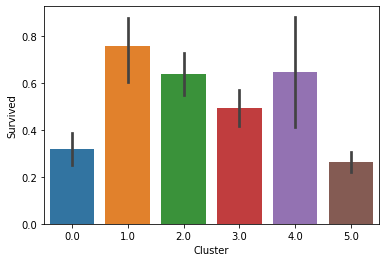

In [13]:
# bar plot
sns.barplot(data = treino, x = 'Cluster', y = 'Survived')

#

Os grupos com passageiros que pagaram passagens mais caras tiveram maior chance de sobrevivência
Apesar do grupo 2 ter pago uma passagem mais cara, tiveram mais mortes que o grupo 4

In [14]:
# 9.3.2
# localizando os NaN na feature cluster
treino.loc[treino['Cluster'].isna(),:] # os três passageiros com NaN na coluna Cluster se encaixam no grupo 2.0, que tem a maior Fare entre todos os outros.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Cluster
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,0,True,NaN
679,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,1,False,NaN
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,0,True,NaN


In [15]:
# 9.3.2 b)
null = [258,679,737] # linhas nulas
treino['Cluster'].fillna(2.0,inplace = True)

print(treino['Cluster'].iloc[null]) # usando o iloc pra acessar linhas com o index

258    2.0
679    2.0
737    2.0
Name: Cluster, dtype: float64


PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
FamilySize       int64
IsAlone           bool
Cluster        float64
dtype: object
PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
FamilySize       int64
IsAlone           bool
Cluster        float64
dtype: object


Fare          0.143271
Cluster       0.034554
FamilySize    0.034409
Pclass        0.032923
Age           0.024801
Parch         0.023077
SibSp         0.012635
Name: MI Scores, dtype: float64

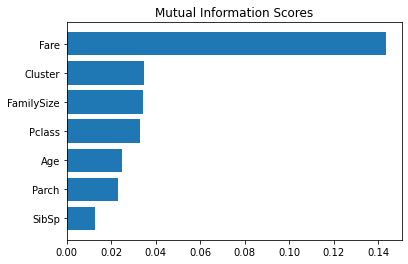

In [16]:
# 9.3.3
# avaliando a nova feature
aval = treino.drop(['PassengerId','Survived','Ticket','Cabin','Title','IsAlone','Sex','Embarked'], axis =1)
print(treino.dtypes)
#dfeat = (treino.dtypes == int) | (treino.dtypes == bool)
dfeat = 'auto'
#dfeat = ['Sex','SibSp','Parch','Fare','Pclass','Embarked','Cluster']
#for colname in treino.select_dtypes("object"):
    #treino[colname], _ = treino[colname].factorize()
#print(dfeat)
print(treino.dtypes)
treino.fillna(0,inplace=True)
miplot(aval,y,dfeat)


In [17]:
#9.3.4
from mlxtend.preprocessing import minmax_scaling
novodf = pd.DataFrame()
display(novodf)
cols = ['Age','Fare']
for i in treino[cols]:
    display(i)
    novodf[i] = minmax_scaling(treino[cols],columns=i)
display(novodf)

""


'Age'

'Fare'

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
886,0.334004,0.025374
887,0.233476,0.058556
888,0.346569,0.045771
889,0.321438,0.058556


<AxesSubplot:xlabel='Age', ylabel='Count'>

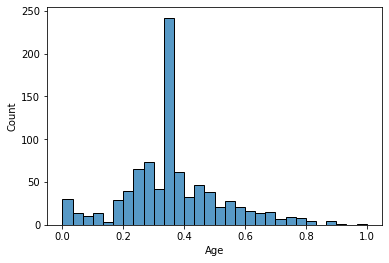

In [18]:
# 9.3.4 b)
sns.histplot(data=novodf, x='Age')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

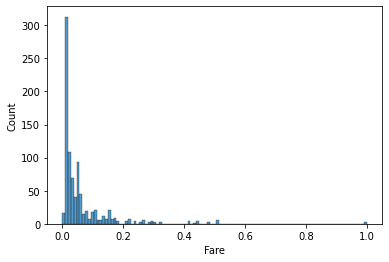

In [19]:
sns.histplot(data=novodf,x = 'Fare')

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
novodfpca = pca.fit_transform(novodf)
novodfpca = pd.DataFrame(novodfpca)
display(novodfpca)

,0,1
0,-0.096407,-0.040438
1,0.114800,0.066501
2,-0.046221,-0.043518
3,0.074145,0.034439
4,0.066462,-0.053156
...,...,...
886,-0.032837,-0.034748
887,-0.130081,0.007091
888,-0.018537,-0.015527
889,-0.042456,-0.000595


1    0.092854
0    0.074675
Name: MI Scores, dtype: float64

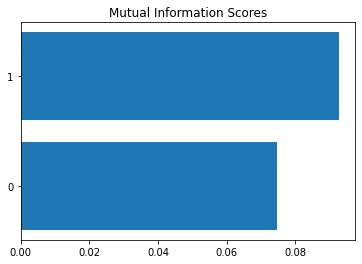

In [21]:
# teste miscore
ddfeat = False
miplot(novodfpca,y,ddfeat)

# como ambas tem um score abaixo de 0.1, não me parecem muito úteis

In [22]:
# 9.4.1
X_encode = treino.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = treino.drop(X_encode.index)
y_train = y[X_pretrain.index]

from category_encoders import MEstimateEncoder
encoder = MEstimateEncoder(cols=["Title"], m=5.0)
encoder.fit(X_encode, y_encode)
X_train = encoder.transform(X_pretrain)
display(X_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Cluster
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,0.167032,1,False,5.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.754600,1,False,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0.677668,0,True,5.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0.754600,1,False,2.0
5,6,0,3,male,28.0,0,0,330877,8.4583,0,Q,0.167032,0,True,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,382652,29.1250,0,Q,0.754600,5,False,0.0
886,887,0,2,male,27.0,0,0,211536,13.0000,0,S,0.269058,0,True,5.0
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,0,S,0.677668,3,False,3.0
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0.167032,0,True,3.0


<Figure size 540x360 with 0 Axes>

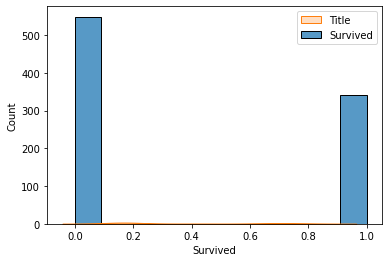

In [23]:
plt.figure(dpi=90)
fig, ax = plt.subplots()
sns.histplot(data=treino['Survived'],ax=ax)
sns.kdeplot(data=X_train['Title'], shade=True,ax=ax)
ax.set_xlabel("Survived")
ax.legend(labels=['Title', 'Survived']);